### Explain the overall purpose of the package


![Butter](https://media.giphy.com/media/ziEGYtWrYAPcc/giphy.gif "purpose")

The Python package numpy.random is used, as the name might suggest, to generate random[<sup>1</sup>](#fn1)  data.

When designing an algorithm, it is rarely feasible (if not impossible) to test every single possible set of input data that could conceivably occur. Therefore, programmers use a sample of data to test their algorithms and hypotheses, and if the chosen sample is suitably representative of the entire possible set of input data, it is not unreasonable to infer that the outcomes for the chosen sample can be used to predict the outcomes for the entire possible data set.

However, choosing a suitable such sample is sometimes nontrivial. If we want to predict how good at basketball a class of 100 undergraduates might be, we could pick 10 students to be assessed by, say, Michael Jordan, or whoever would make it into Space Jam these days, and then Michael could tell us whether these 10 students were any good. We, as data scientists, could then extrapolate and assume that this held true for the entire class. 
The trick is in how to choose the right group of 10 students. If we chose, for example, the 10 tallest students in the class, it would be unwise to use Michael's decision as grounds to enter a team in the All-Priests five-a-side Over-75s Indoor Challenge Basketball Match because it is unlikely that the ten tallest students' skills would be representative of those of the rest of the class. However, if we chose the 10 students whose names came first alphabetically (maybe - I have not conducted any relevant research) as our representative sample, and Michael gave them the nod, then perhaps we could lead Craggy Institute of Technology to victory after all.

This example is not quite random, but it hopefully illustrates the importance of choosing a non-biased input sample, which is one of the main principles behind the need for generating random data.

A human, asked to select a random sample of students, might not be relied upon to be nonbiased - they might pick only students whom they could easily see in the first few rows of a lecture theatre, or, indeed, ones who had actually turned up to class. 
If instructed to be random, a human not only finds this difficult to do, but might introduce subconscious biases into their "algorithms" - for example, choosing a group with gender parity, when the actual cohort is heavily weighted towards one generator.

For this reason, not to mention sheer volume, computers are much better at randomly selecting people, numbers, examples, etc. than people are.

This is where numpy.random comes in. It is one of these packages which is used to generate random data. It contains dozens of functions, which can be used to randomly generate or randomly arrange data according to specified (or default) instructions and distributions (more on those later).  


<span id="fn1">[1]  We use the term somewhat loosely, as will become clear later. </span>



### Explain the use of the "Simple Random Data" and "Permutations" functions

We now look at several of the functions in the Simple Random Data section of the numpy.random manual.

In [1]:
import numpy.random as np # loads the package (abbreviated to np for typing and tidyness purposes)

np.rand(1,2,3)  # returns an n-dimensional array A with dimensions a_1, a_2,...,a_j,...,a_n, with a_j
                # being the size of the array in the j-th dimension. The entries are randomly selected
                # numbers on the (0,1) open interval.


array([[[ 0.64002997,  0.24122341,  0.72058004],
        [ 0.72358088,  0.9719534 ,  0.87247399]]])

This _rand_ function takes as input a string of length _n_ and returns an n-dimensional array. (You can think of this as nested lists with _n_ levels; eg. if _n_=1, you just have a list of numbers; if _n_=2, you have a matrix (or a list of lists); if if _n_=3, you have a three-dimensional array (or list of matrices, or list of list of lists), etc.)

The entries in this _n_-dimensional array are randomly selected numbers between 0 and 1 (not inclusive). These numbers are uniformly distributed; ie. every number within the specified interval has an equal chance of being selected.

To simply illustrate this, we will generate a one-dimensional list of numbers with 100 entries, and plot this on a histogram with interval increments of, say, 0.1

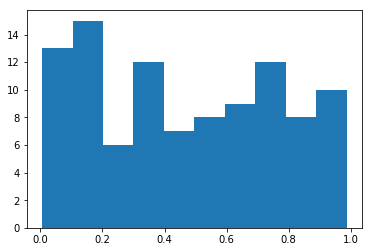

In [2]:
import numpy.random as np
import matplotlib.pyplot as plt # importing a python package for plots

np.seed(42) # see later section on seeds - for now, this is used to ensure my explanations refer to the correct numbers;
            # nothing more
A=np.rand(100) # random selection of 100 numbers
plt.hist(A,bins=10) # make a histogram with said numbers; bins are the number of groups into which our output is divided
plt.show() # show the histogram

It might not immediately seem like all of these numbers have had an equal chance of being selected - there are more than twice as many numbers between 0.1 and 0.2 as there are between 0.2 and 0.3. However, if we increase the size of our data set to 1000 random numbers, we will see things become more equal.   

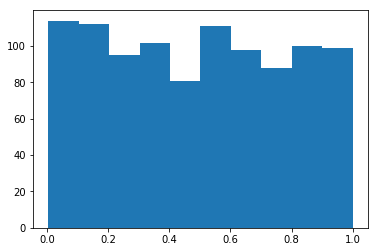

In [3]:
np.seed(42)
A=np.rand(1000) # random selection of 1000 numbers
plt.hist(A,bins=10) 
plt.show()

Already, things seem to be much more even, but just to cement the notion, we will try again with a million random numbers.

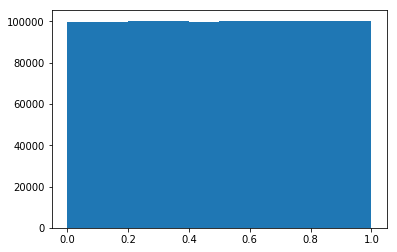

In [4]:
np.seed(42)
A=np.rand(1000000) # random selection of 1000000 numbers
plt.hist(A,bins=10) 
plt.show()

If that does not convince you the system is fair, then I don't know what will.

However, not every distribution is as uniform as the uniform distribution. Hence the nomenclature, I suppose.

The most common distribution you are likely to come across, another contender for the Ronseal award, is the Normal distribution. This distribution describes data points where things tend very strongly towards being average. 

Consider (spurious infographic warning) how loveable you are. The vast majority of people are averagely loveable. Some people, like data scientists, much more so, and some people, like politicians, less so. Most other people will find themselves somewhere in between. This can be plotted using the _randn_ function (where the 'n' stands for 'normal'). Here, again, the function can take further inputs and generate n-dimensional arrays, but we will focus on a simple list for illustrative purposes.

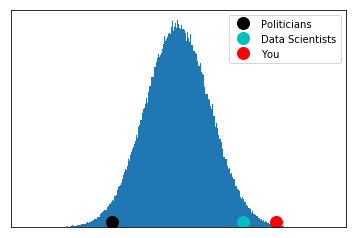

In [18]:
np.seed(1)
A=np.randn(1000000)
B=plt.hist(A,bins=1000)
plt.plot(-2,100,'ko',ms=12,label='Politicians'); # Adding points and twiddling with labels here
plt.plot(2,100,'co',ms=12,label='Data Scientists'); 
plt.plot(3,100,'ro',ms=12,label='You'); 
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.legend(); 
plt.show(B)

The functions _randint_ and _random_integers_ allow you to specify an upper and lower bound for your random data, and use a uniform distribution, with the former allowing the upper value to be one of the random numbers, while in the latter it is an exclusive upper bound. 

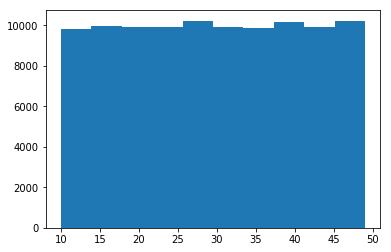

In [6]:
np.seed(2)
A=np.randint(10,50,100000)
B=plt.hist(A,bins=10)
plt.show(B)

random_sample([size]), random([size]), ranf([size]), sample([size]) 
all appear to be identical and return random floats in the half-open interval [0.0, 1.0). Let's check.

In [7]:
np.seed(3) # See later discussion on seeds
A=np.random_sample([50])
np.seed(3)
B=np.random([50])
np.seed(3)
C=np.ranf(50)
np.seed(3)
D=np.sample(50)
print(A)
print(B)
print(C)
print(D)

[ 0.5507979   0.70814782  0.29090474  0.51082761  0.89294695  0.89629309
  0.12558531  0.20724288  0.0514672   0.44080984  0.02987621  0.45683322
  0.64914405  0.27848728  0.6762549   0.59086282  0.02398188  0.55885409
  0.25925245  0.4151012   0.28352508  0.69313792  0.44045372  0.15686774
  0.54464902  0.78031476  0.30636353  0.22195788  0.38797126  0.93638365
  0.97599542  0.67238368  0.90283411  0.84575087  0.37799404  0.09221701
  0.6534109   0.55784076  0.36156476  0.2250545   0.40651992  0.46894025
  0.26923558  0.29179277  0.4576864   0.86053391  0.5862529   0.28348786
  0.27797751  0.45462208]
[ 0.5507979   0.70814782  0.29090474  0.51082761  0.89294695  0.89629309
  0.12558531  0.20724288  0.0514672   0.44080984  0.02987621  0.45683322
  0.64914405  0.27848728  0.6762549   0.59086282  0.02398188  0.55885409
  0.25925245  0.4151012   0.28352508  0.69313792  0.44045372  0.15686774
  0.54464902  0.78031476  0.30636353  0.22195788  0.38797126  0.93638365
  0.97599542  0.67238368 

In [8]:
import numpy
numpy.array_equal(A,B) # Note to self: np.array_equal did not work because np is numpy.random here as opposed to numpy
numpy.array_equal([A,B,C],[B,C,D]) # A lazy way to check if all the arrays are equal to each other.

True

In [9]:
import string
np.seed(4)
print(np.choice(list(string.ascii_uppercase),20,replace=True))
np.seed(4)
print(np.choice(list(string.ascii_uppercase),20,replace=False))

['O' 'X' 'F' 'B' 'I' 'X' 'I' 'S' 'J' 'H' 'N' 'X' 'X' 'Z' 'I' 'E' 'S' 'M'
 'G' 'K']
['Y' 'Q' 'W' 'A' 'D' 'K' 'M' 'L' 'G' 'C' 'E' 'U' 'T' 'P' 'R' 'Z' 'N' 'H'
 'J' 'S']


The function _choice_ gives a random selection of elements from a list you provide. The _replace_ attribute dictates whether or not an element can be chosen more than once - ie, whether the element is replaced back into the list after it is chosen. See above where the first list contains three copies of 'I', while none of the elements in the second list are repeated. 
In fact, if you wish to choose 27 letters, for example, you must allow replacement, because otherwise you end up searching an empty list, and an error is thrown.

In [10]:
np.seed(4)
print(np.choice(list(string.ascii_uppercase),27,replace=True))
np.seed(4)
print(np.choice(list(string.ascii_uppercase),27,replace=False))

['O' 'X' 'F' 'B' 'I' 'X' 'I' 'S' 'J' 'H' 'N' 'X' 'X' 'Z' 'I' 'E' 'S' 'M'
 'G' 'K' 'U' 'D' 'A' 'X' 'V' 'V' 'J']


ValueError: Cannot take a larger sample than population when 'replace=False'

Each of these elements, the letters, are equally likely. However, we can also provide a list of probabilities. For example, if you were devising some sort of automated Carol Vordermann/Rachel Riley replacement for Countdown, you would want vowels to appear more often than consonants. 

![rachel](tnetennba.png "rachel")

[0.10869565217391304, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.10869565217391304, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.10869565217391304, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.10869565217391304, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.10869565217391304, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608]
Counter({'O': 121, 'A': 113, 'I': 110, 'U': 109, 'E': 91, 'X': 33, 'B': 27, 'T': 26, 'H': 26, 'Y': 24, 'R': 24, 'L': 24, 'P': 24, 'Q': 22, 'M': 22, 'D': 21, 'F': 21, 'K': 20, 'N': 19, 'Z': 19, 'V': 19, 'J': 18, 'G': 18, 'W': 17, 'C': 16, 'S': 16})


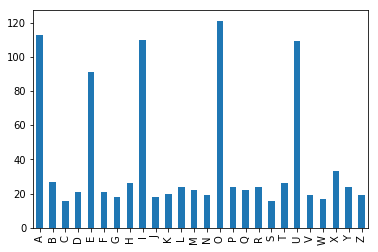

In [11]:
import pandas
from collections import Counter
from sortedcontainers import SortedDict

letters=list(string.ascii_uppercase)
probs=[1]*26
vowels=('A','E','I','O','U')

# This function makes the vowels 5 times as likely to appear as the consonants
def isvowel(n):
    if letters[n] in vowels:
        probs[n]=5  
        
for i in range(len(letters)):
    isvowel(i)

probs[:] = [x / sum(probs) for x in probs]

print(probs)

letter_selection=np.choice(letters,1000,replace=True,p=probs)

# To make this easier to visualise, we rearrange in alphabetical order, and provide a histogram.
letter_counts = Counter(letter_selection)
print(letter_counts)
sorted_letter_counts=SortedDict(letter_counts)
df = pandas.DataFrame.from_dict(sorted_letter_counts,orient='index')
df.plot(kind='bar',legend=None)
plt.show()


If you want to add an extra layer of unpredictability and incomprehensibility to your data, say, for security purposes, you can use the byte function, which opens up a whole new world of gobbledygook.

In [12]:
A=np.bytes(10)
print(A)

b'|C\xbc\xae\xa3i\xf7\xf3\xb0\x17'


Sometimes you want to randomly rearrange the order of the items in your list of elements. You could do this by, say, noting the positional value of each of your elements, randomly selecting positional values without replacement until there were none left, and then repositioning the elements according to the order of this new selection, or you could let numpy.random's _shuffle_ or _permutation_ functions do the hard work for you.

In [13]:
alphabet=list(string.ascii_uppercase)
jumbled=np.permutation(alphabet)
print("The alphabet is\n", alphabet,"\n")
print("The bhetlapa is\n", jumbled, "\n")

The alphabet is
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] 

The bhetlapa is
 ['C' 'G' 'X' 'N' 'T' 'F' 'I' 'J' 'P' 'K' 'V' 'W' 'U' 'Z' 'S' 'D' 'Y' 'B'
 'A' 'L' 'R' 'H' 'O' 'Q' 'M' 'E'] 



_shuffle_ is similar to _permutation_, but it changes the original array, whereas _permutation_ makes a copy with jumbled elements of the original. (Also, if given some integer _n_ as input, _permutation_ provides a permuted list of the integers from 0 to _n-1_.

In [14]:
A=np.permutation(5)
print("A is\n",A)
print("A permutation of A is\n", np.permutation(A),"\nbut A is still\n", A)
np.shuffle(A)
print("whereas, if we use shuffle, A itself changes, and is now\n", A)


A is
 [4 3 0 1 2]
A permutation of A is
 [3 1 0 2 4] 
but A is still
 [4 3 0 1 2]
whereas, if we use shuffle, A itself changes, and is now
 [0 4 1 2 3]


If we are permuting arrays, the order of the elements in the inner lists will not change, only the order of the outermost lists

In [15]:
A=np.randint(1,10,[3,5])
print("A is\n",A)
print("A permutation gives\n", np.permutation(A))

A is
 [[7 7 3 2 1]
 [4 9 7 5 9]
 [1 9 9 4 8]]
A permutation gives
 [[4 9 7 5 9]
 [1 9 9 4 8]
 [7 7 3 2 1]]


### 3. Explain the use and purpose of at least five “Distributions” functions.

In the interests of expediency, I will include and refer to the _uniform_ and _normal_ distributions mentioned elsewhere.
_uniform_ gives a uniform distribution between given bounds, and _normal_ gives a normal or Gaussian distribution between given bounds.

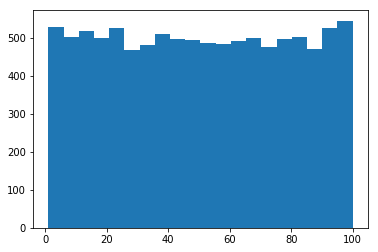

In [101]:
A=np.uniform(1,100,10000)
plt.hist(A,bins=20)
plt.show()

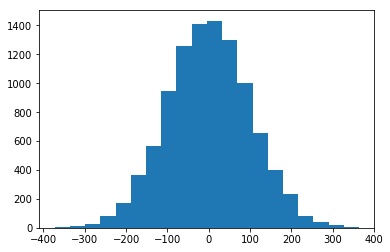

In [102]:
B=np.normal(1,100,10000)
plt.hist(B,bins=20)
plt.show()

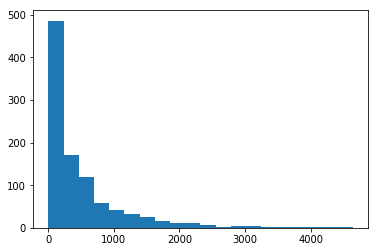

In [78]:
C=np.exponential(range(1000))
plt.hist(C,bins=20)
plt.show()

When most people in the media talk about "exponential growth" as a soundbyte, the growth in question is rarely anything approaching exponential.

A binomial distribution is one where there are two possible outcomes, say, failure or success, or heads or tails. The two probabilities need not necessarily be equal. The binomial distribution measures the likelihood of a certain amount of successes versus failures in a number of trials. Eg., if tossing a supposedly fair coin 100 times, we would expect the chances of a 50:50 split to be much more likely than a 99:1 split. 

In the graph below, we see that of 10000 "coin-tosses" (we have assumed equal probability), the instances of Heads winning 50% of the time are about 3000 of the 10000, whereas the instances where Heads win 70% of the time are well under 100.

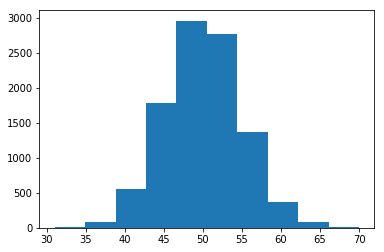

In [87]:
D=np.binomial(100,0.5,10000)
plt.hist(D)
plt.show()

If we had a loaded coin, which favoured heads, the graph will skew substantially:

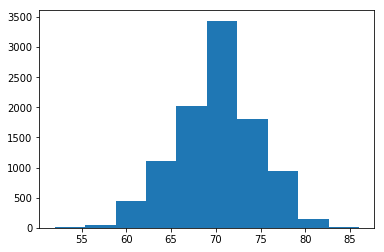

In [90]:
D=np.binomial(100,0.7,10000)
plt.hist(D)
plt.show()

Now the chances of Heads winning 70% of the time 3500 out of 10000. 

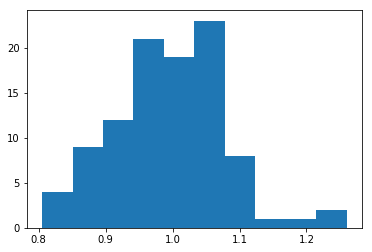

In [103]:
E=np.wald(1,100,100)
plt.hist(E)
plt.show()

This is the inverse of the Gaussian/normal distribution.

### Explain the use of seeds in generating random numbers

![Einstein](https://thebestyoumagazine.co/wp-content/uploads/Einstein-Frame-1036x583.jpg "einstein")


Okay, so Einstein didn't actually say this, but if he had, he would have had a point. 
And computers are not insane, despite what HAL, Hactar, or Skynet might lead one to believe. So if you give a computer a set of instructions to generate a random number, it will follow your instructions to the letter, and can generate that same "random" number every time, which is good for reproducibility, but not so good for things like security, testing, etc.

Look at the next example where we generate two random lists.

In [ ]:
np.seed(5)
A=np.rand(10)
print("So A is\n")
print(A)

print("\n\nLa la lah, let's think about something else for a minute before generating our random numbers again...\n\nOoh, look -- a butterfly!")
print(r"""                                                                 
                                                                LLLLLLLLLLL
                                                            __LLLLLLLLLLLLLL
                                                           LLLLLLLLLLLLLLLLL
                                                         _LLLLLLLLLLLLLLLLLL
                                                        LLLLLLLLLLLLLLLLLLLL
                                                      _LLLLLLLLLLLLLLLLLLLLL
                                                      LLLLLLLLLLLLLLLLLLLLLL
                                              L     _LLLLLLLLLLLLLLLLLLLLLLL
                                             LL     LLLLLL~~~LLLLLLLLLLLLLL
                                            _L    _LLLLL      LLLLLLLLLLLLL
                                            L~    LLL~        LLLLLLLLLLLLL
                                           LL   _LLL        _LL   LLLLLLLL
                                          LL    LL~         ~~     ~LLLLLL
                                          L   _LLL_LLLL___         _LLLLLL
                                         LL  LLLLLLLLLLLLLL      LLLLLLLL
                                         L  LLLLLLLLLLLLLLL        LLLLLL
                                        LL LLLLLLLLLLLLLLLL        LLLLL~
                  LLLLLLLL_______       L _LLLLLLLLLLLLLLLL     LLLLLLLL
                         ~~~~~~~LLLLLLLLLLLLLLLLLLLLLLLLL~       LLLLLL
                       ______________LLL  LLLLLLLLLLLLLL ______LLLLLLLLL_
                   LLLLLLLLLLLLLLLLLLLL  LLLLLLLL~~LLLLLLL~~~~~~   ~LLLLLL
             ___LLLLLLLLLL __LLLLLLLLLLLLL LLLLLLLLLLLLL____       _LLLLLL_
          LLLLLLLLLLL~~   LLLLLLLLLLLLLLL   LLLLLLLLLLLLLLLLLL     ~~~LLLLL
      __LLLLLLLLLLL     _LLLLLLLLLLLLLLLLL_  LLLLLLLLLLLLLLLLLL_       LLLLL
     LLLLLLLLLLL~       LLLLLLLLLLLLLLLLLLL   ~L ~~LLLLLLLLLLLLL      LLLLLL
   _LLLLLLLLLLLL       LLLLLLLLLLLLLLLLLLLLL_  LL      LLLLLLLLL   LLLLLLLLL
  LLLLLLLLLLLLL        LLLLLLLLLLLLL~LLLLLL~L   LL       ~~~~~       ~LLLLLL
 LLLLLLLLLLLLLLL__L    LLLLLLLLLLLL_LLLLLLL LL_  LL_            _     LLLLLL
LLLLLLLLLLLLLLLLL~     ~LLLLLLLL~~LLLLLLLL   ~L  ~LLLL          ~L   LLLLLL~
LLLLLLLLLLLLLLLL               _LLLLLLLLLL    LL  LLLLLLL___     LLLLLLLLLL
LLLLLLLLLLLLLLLL              LL~LLLLLLLL~     LL  LLLLLLLLLLLL   LLLLLLL~
LLLLLLLLLLLLLLLL_  __L       _L  LLLLLLLL      LLL_ LLLLLLLLLLLLLLLLLLLLL
 LLLLLLLLLLLLLLLLLLLL        L~  LLLLLLLL      LLLLLLL~LLLLLLLLLLLLLLLL~
  LLLLLLLLLLLLLLLLLLLL___L_ LL   LLLLLLL       LLLL     LLLLLLLLLLLLLL
   ~~LLLLLLLLLLLLLLLLLLLLLLLL     LLLLL~      LLLLL        ~~~~~~~~~
           LLLLLLLLLLLLLLLLLL_ _   LLL       _LLLLL
               ~~~~~~LLLLLLLLLL~             LLLLLL
                         LLLLL              _LLLLLL
                         LLLLL    L     L   LLLLLLL
                          LLLLL__LL    _L__LLLLLLLL
                          LLLLLLLLLL  LLLLLLLLLLLL
                           LLLLLLLLLLLLLLLLLLLLLL
                            ~LLLLLLLLLLLLLLLLL~~
                               LLLLLLLLLLLLL
                                 ~~~~~~~~~""")

print("\n\nOkay, back to work...")

np.seed(5)
B=np.rand(10)

print("\nSo A was\n")
print(A)
print("\nAnd now B is\n")
print(B)
print("\nHmm...")


You will notice that these two lists of supposedly "randomly generated" numbers are _identical_. This might, justifiably, make one suspicious of just how random these numbers are. 
On one hand, it is very convenient for reproducing results and running tests such that you and whoever you share the algorithm with (such as your boss or your lecturer) get the same output, but it would be worrying if I told you I was using one of the above lists to encrpyt your credit card data, because the numbers are evidently reproduceable.

This is possible by the use of _seeds_. 

A python program will follow the instructions of the programmer in its efforts to create a random number. However, as we have noted, a program is deterministic, so the same set of instructions will return the same set of results, and if we want different results, we need a differing input, but obviously we cannot expect a programmer to input a different input every time we want a different output; that would be defeat the entire point, and be quite infeasible. Therefore, the programmer instructs the computer to take an alternative input, say, the computer's system time, as this extra input, and to include this input in its quest to generate a random number, by using it to randomly select a digit from, say, somewhere in the decimal expansion of pi, or some other transcendental number. This number (and other aspects of the algorithm) will be specified by the programmer, but the time will not, and indeed, cannot be. Observe how difficult it would be to try to gauge the system time.

In [ ]:
import datetime

start_time=datetime.datetime.now().timestamp()
for i in range(10):
    print(datetime.datetime.now())
end_time=datetime.datetime.now().timestamp()
print("\nThat took", end_time-start_time, "seconds.")

This makes it virtually impossible to retrieve the seed, which is good for security, but not so good for reproducing results. 

We are, however, allowed to provide an input for the _seed_ function, and specify which seed numpy.random uses. This allows us to run a simulation with some random data, but then repeat the simulation exactly, if we use the same specified seed. Therefore, if some random data sample you have used crashes an algorithm you have written, you can tweak the algorithm, and copy the seed from which the problematic data set arose, and see if your tweaks have been successful.

Suppose I want to calculate the mean of some random set of data. I try the following algorithm.

HYPOTHESIS: Algorithm to calulate the mean of a list A with _n_ elements is $A_i-A_{i+2}\mid i<n-2$ (I'm counting from 1 here, not 0).

In [ ]:
import numpy as NP
np.seed(6)
A=np.randint(1,10,4)
print(A)
print("Mean = 4-1 = 5-2")
NP.mean(A) # Here we use numpy's actual function for calculating the mean. We will assume it is correct.

Seems correct. Let's try another.

In [ ]:
np.seed(7)
B=np.randint(1,10,4)
print(B)
print("Mean = 5-4 = 7-4")
NP.mean(B)

Ooh, so close. Back to the drawing board then.

How about the mean is $\displaystyle\sum\limits_{i=1}^n \frac{A_i}{n}$?

In [ ]:
np.seed(6)
B=np.randint(1,10,4)
print(B)
print("Mean = (4+5+1+2)/4")
NP.mean(B)

So our original example still works, which is good - how about our problematic example?

In [ ]:
np.seed(7)
B=np.randint(1,10,4)
print(B)
print("Mean = (5+7+4+4)/4")
NP.mean(B)

Excellent! So, as you can see, this makes for much easier troubleshooting, and we will now, without loss of generality, assume that our new method for calculating the mean is correct.